In [2]:
import xarray as xr
import numpy as np 
import pandas as pd

In [3]:
#load water eden water depth data 2021 q3
ds = xr.open_dataset ("C:/Users/ihasan2020/Desktop/2011_q3_depth_v3.nc")
da =ds ["depth"]
da

<xarray.DataArray 'depth' (time: 92, y: 405, x: 287)>
[10693620 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-07-01T12:00:00 ... 2011-09-30T12:00:00
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05
Attributes:
    units:           cm
    long_name:       Water Depth (cm)
    esri_pe_string:  PROJCS["NAD_1983_UTM_Zone_17N",GEOGCS["GCS_North_America...
    grid_mapping:    transverse_mercator
    min:             -63.769690322922045
    max:             456.42757171285734

In [4]:
#variables are in our dataset
ds.data_vars

Data variables:
    transverse_mercator  int32 ...
    depth                (time, y, x) float32 ...

In [5]:
#monthly_data = ds.resample (freq = 'm', dim = 'time', how = 'mean')

In [6]:
#look at the NetCDF representation 
ds.info()

xarray.Dataset {
dimensions:
	time = 92 ;
	y = 405 ;
	x = 287 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = time step ;
		time:_CoordinateAxisType = Time ;
		time:standard_name = time ;
	float64 y(y) ;
		y:units = meters ;
		y:long_name = y coordinate of projection ;
		y:_CoordinateAxisType = GeoY ;
		y:standard_name = projection_y_coordinate ;
	float64 x(x) ;
		x:units = meters ;
		x:long_name = x coordinate of projection ;
		x:_CoordinateAxisType = GeoX ;
		x:standard_name = projection_x_coordinate ;
	int32 transverse_mercator() ;
		transverse_mercator:units = meters ;
		transverse_mercator:grid_mapping_name = transverse_mercator ;
		transverse_mercator:longitude_of_central_meridian = -81.0 ;
		transverse_mercator:latitude_of_projection_origin = 0.0 ;
		transverse_mercator:scale_factor_at_central_meridian = 0.9996 ;
		transverse_mercator:false_easting = 500000.0 ;
		transverse_mercator:false_northing = 0.0 ;
		transverse_mercator:semi_major_axis = 6378137.0 ;
		transv

In [7]:
#slelect one variable and pick the first entry along the first axis (time)
ds.depth [0]

<xarray.DataArray 'depth' (y: 405, x: 287)>
[116235 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2011-07-01T12:00:00
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05
Attributes:
    units:           cm
    long_name:       Water Depth (cm)
    esri_pe_string:  PROJCS["NAD_1983_UTM_Zone_17N",GEOGCS["GCS_North_America...
    grid_mapping:    transverse_mercator
    min:             -63.769690322922045
    max:             456.42757171285734

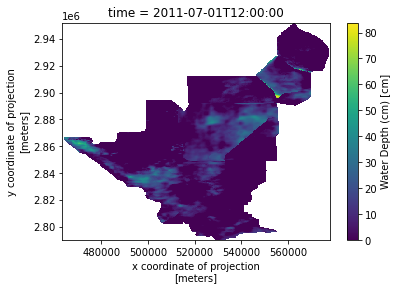

In [8]:
#plot depth of one date 
ds.depth [0].plot()

In [10]:
#dataset dimensions
ds.dims

Frozen({'time': 92, 'y': 405, 'x': 287})

In [11]:
#dataset coordinates
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 2011-07-01T12:00:00 ... 2011-09-30T12:00:00
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05

In [12]:
#The actual (numpy) arrray
ds.depth.data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [13]:
#Looking at the attribute 
ds.attrs

{'institution': 'USGS',
 'source': 'EDENv3.R',
 'qaqc': 'under review',
 'comment': 'Product derived from RBF interpolation of gages over the EDEN extent',
 'Conventions': 'CF-1.4',
 'cerp_version': 'CERP-1.2'}

In [24]:
#demonstrating customised time-seris data  
ds.sel(time= slice("2021-07-01","2021-08-30"))
       

<xarray.Dataset>
Dimensions:              (time: 0, y: 405, x: 287)
Coordinates:
  * time                 (time) datetime64[ns] 
  * y                    (y) float64 2.79e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x                    (x) float64 4.634e+05 4.638e+05 ... 5.774e+05 5.778e+05
Data variables:
    transverse_mercator  int32 -2147483647
    depth                (time, y, x) float32 ...
Attributes:
    institution:   USGS
    source:        EDENv3.R
    qaqc:          under review
    comment:       Product derived from RBF interpolation of gages over the E...
    Conventions:   CF-1.4
    cerp_version:  CERP-1.2

In [25]:
#performing arithmetic operation on the data set (+)
da + 1.5

<xarray.DataArray 'depth' (time: 92, y: 405, x: 287)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-07-01T12:00:00 ... 2011-09-30T12:00:00
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05

In [26]:
da_mean =da.mean(dim="time")
da_mean

<xarray.DataArray 'depth' (y: 405, x: 287)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05

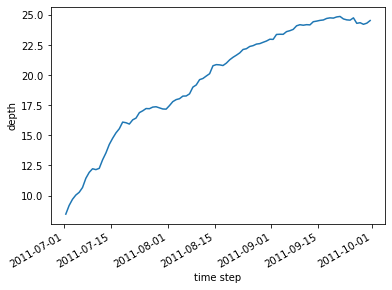

In [27]:
#Calculating standard deviation of water depth and ploting across time 

da.std (dim =["y","x"]).plot()

In [31]:
#compute monthly mean depth
m_mean = ds.groupby("time.month").mean()
m_mean

<xarray.Dataset>
Dimensions:              (y: 405, x: 287, month: 3)
Coordinates:
  * y                    (y) float64 2.79e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x                    (x) float64 4.634e+05 4.638e+05 ... 5.774e+05 5.778e+05
  * month                (month) int64 7 8 9
Data variables:
    transverse_mercator  (month) float64 -2.147e+09 -2.147e+09 -2.147e+09
    depth                (month, y, x) float32 nan nan nan nan ... nan nan nan

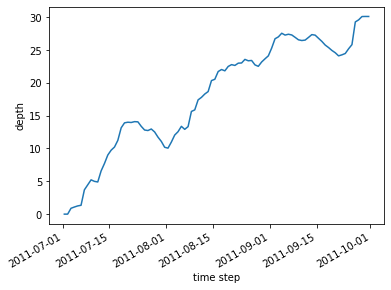

In [29]:
#Calculating median vlaue of water depth and ploting across time 
da.median (dim =["y","x"]).plot()

In [34]:
#Resample to 5days mean (experimental)
ds.depth.resample (time ="5D").mean()

<xarray.DataArray 'depth' (time: 19, y: 405, x: 287)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-07-01 2011-07-06 ... 2011-09-29
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05

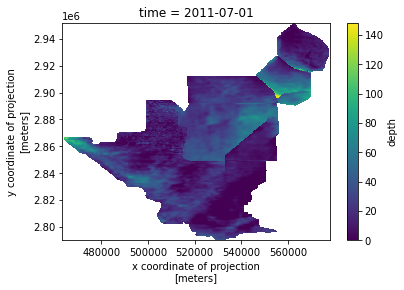

In [47]:
#resample to tri_monthly mean uisng data form 2021-07-01 to 2021-09-30
F_mean = ds.depth.resample (time ="3MS").mean().plot()
F_mean

In [48]:
#for exportable file 
F_mean = ds.depth.resample (time ="3MS").mean()
F_mean

<xarray.DataArray 'depth' (time: 1, y: 405, x: 287)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-07-01
  * y        (y) float64 2.79e+06 2.791e+06 2.791e+06 ... 2.951e+06 2.952e+06
  * x        (x) float64 4.634e+05 4.638e+05 4.642e+05 ... 5.774e+05 5.778e+05

In [50]:
#Exporting final mean of water deapth data as.nc format to import in ArcMap
F_mean.to_netcdf("C:/Users/ihasan2020/Desktop/watrDpt_mean.nc")